### RNN best

2025-04-17 12:37:08.752634: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744886229.625526   76279 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744886229.886052   76279 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744886232.247926   76279 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744886232.247958   76279 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744886232.247960   76279 computation_placer.cc:177] computation placer alr

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' to sys.path
Setup Complete.
Configuration loaded:
  env_name: CartPole-v1
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 2000
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 50
  record_history: 20
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...


2025-04-17 12:37:52.145293: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.
Starting training for 2000 episodes...
Episode 50	Total Reward: 25.00	Actor Loss: 5.5547	Critic Loss: 83.6904
Episode 100	Total Reward: 23.00	Actor Loss: 2.8325	Critic Loss: 48.2793
Episode 150	Total Reward: 19.00	Actor Loss: -0.7684	Critic Loss: 38.9081
Episode 200	Total Reward: 16.00	Actor Loss: 0.1791	Critic Loss: 12.3752
Episode 250	Total Reward: 46.00	Actor Loss: 3.4074	Critic Loss: 50.8963
Episode 300	Total Reward: 23.00	Actor Loss: 2.1677	Critic Loss: 19.1693
Episode 350	Total Reward: 30.00	Actor Loss: 1.6280	Critic Loss: 22.5646
Episode 400	Total Reward: 22.00	Actor Loss: 0.4138	Critic Loss: 9.8791
Episode 450	Total Reward: 12.00	Actor Loss: -1.4144	Critic Loss: 8.2484
Episode 500	Total Reward: 22.00	Actor Loss: 1.5689	Critic Loss: 9.8808
Episode 550	Total Reward: 23.00	Actor Loss: 0.7955	Critic Loss: 11.7787
Episode 600	Total Reward: 27.00	Actor Loss: 1.5881	Critic Loss: 19.9405
Episode 650	Total Reward: 13.00	Actor Loss: -2.3840	Critic Loss: 21.9567
Episode

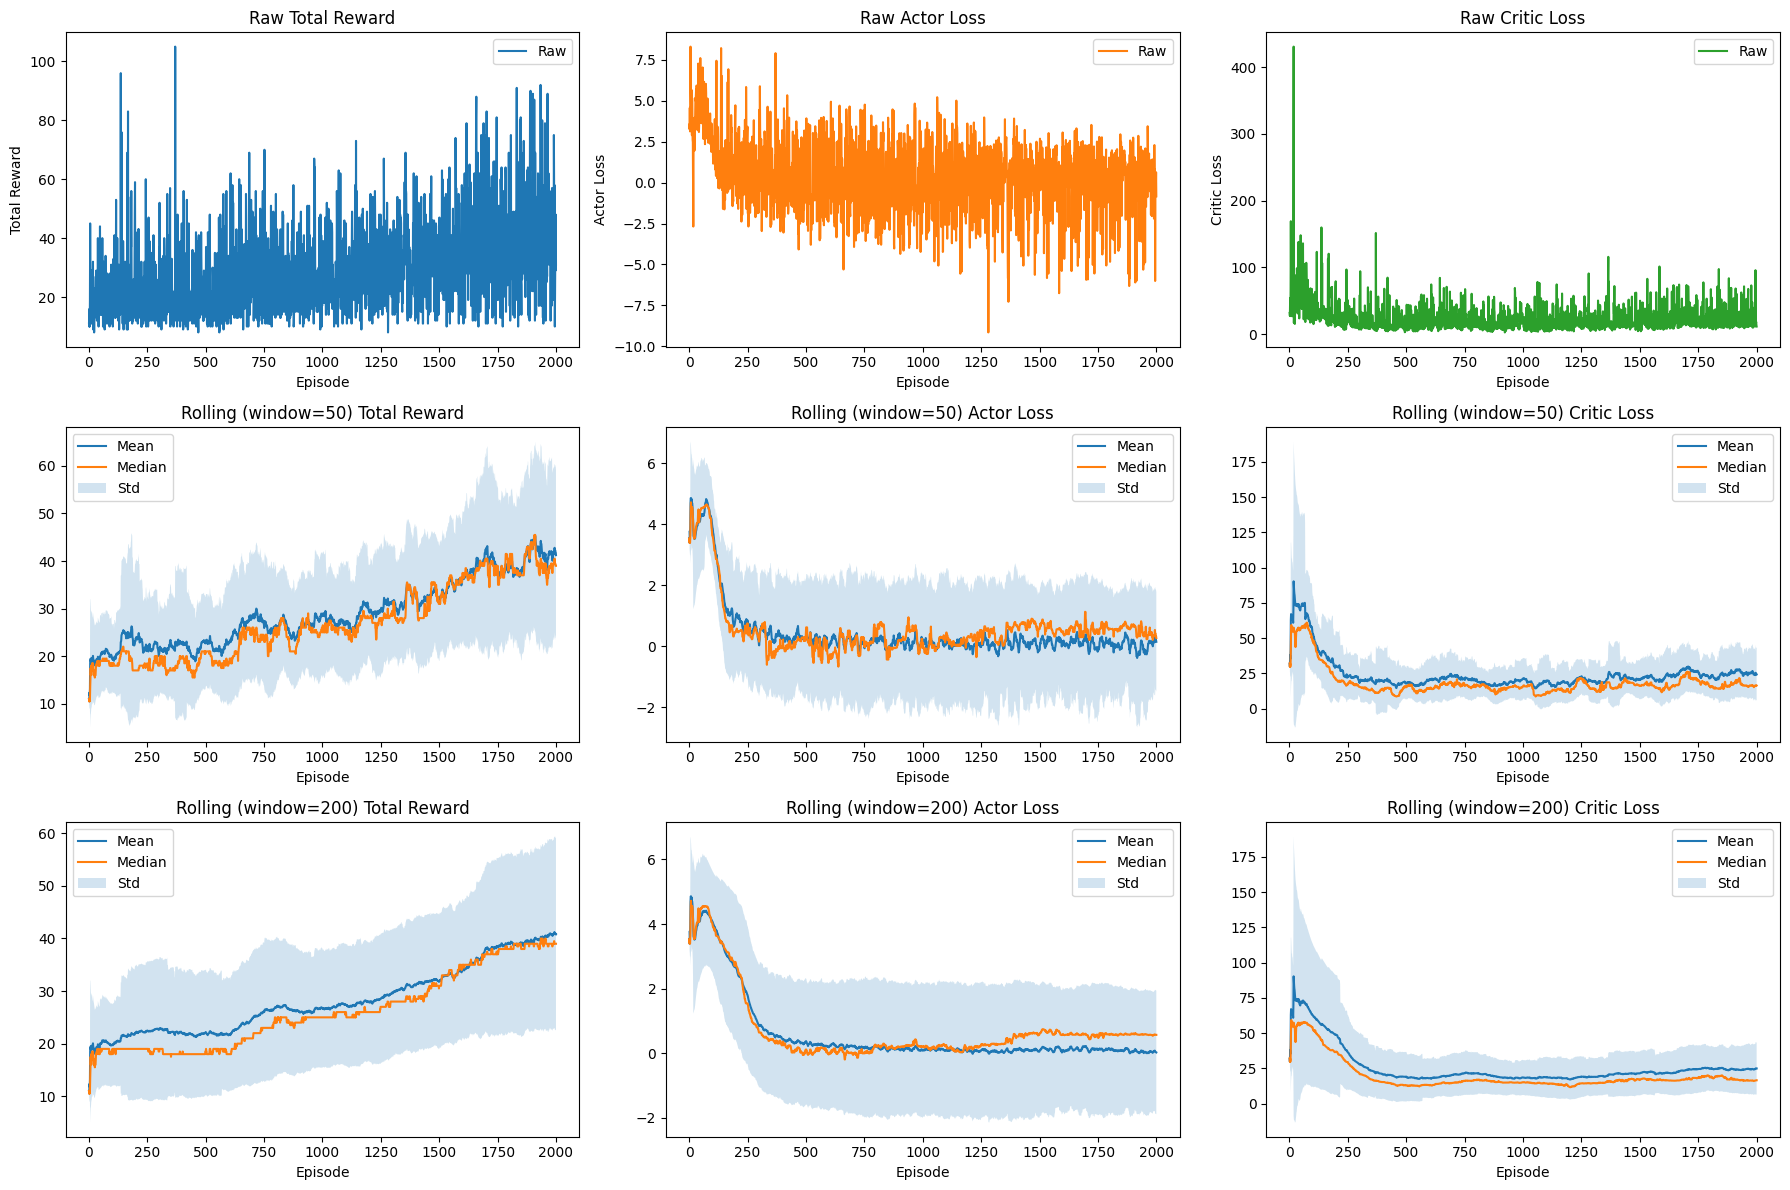

Metrics plot displayed.
Plotting neuron firing rates...


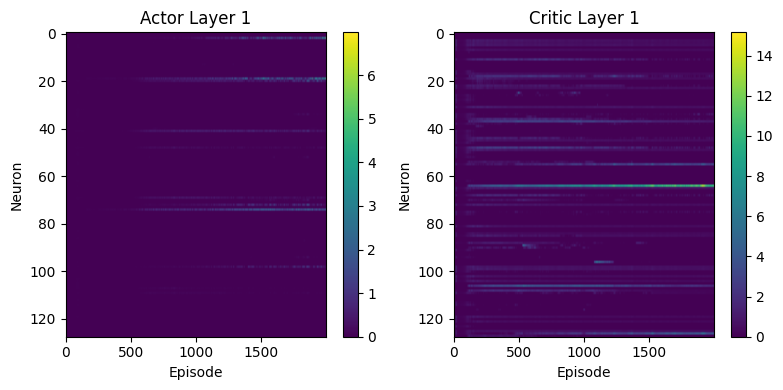

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [1]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from partial_cartpole import CartPolePartialObservation
from actor_critic import ActorCriticAgent
from reinforce import train_agent
from helper_functions import plot_metrics, plot_firing_rates

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Setup Complete.")

# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 2000,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-4,
    "l2_critic": 1e-4,
    "print_interval": 50,
    "record_history": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment to get partial observations
print("Wrapping base environment for partial observations (position, angle)")
env = CartPolePartialObservation(base_env)

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=50,
    window_2=200
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

'/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' already in sys.path
Setup Complete.
Configuration loaded:
  env_name: CartPole-v1
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 2000
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 50
  record_history: 20
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 2000 episodes...
Episode 50	Total Reward: 19.00	Actor Loss: 4.1134	Critic Loss: 56.6063
Episode 100	Total Reward: 16.00	Actor Loss: 2.4178	Critic Loss: 34.6805
Episode 150	Total Reward: 21.00	Actor Loss: 1.8011	Critic Loss: 29.5659
Episode 200	Total Reward: 10.00	Actor 

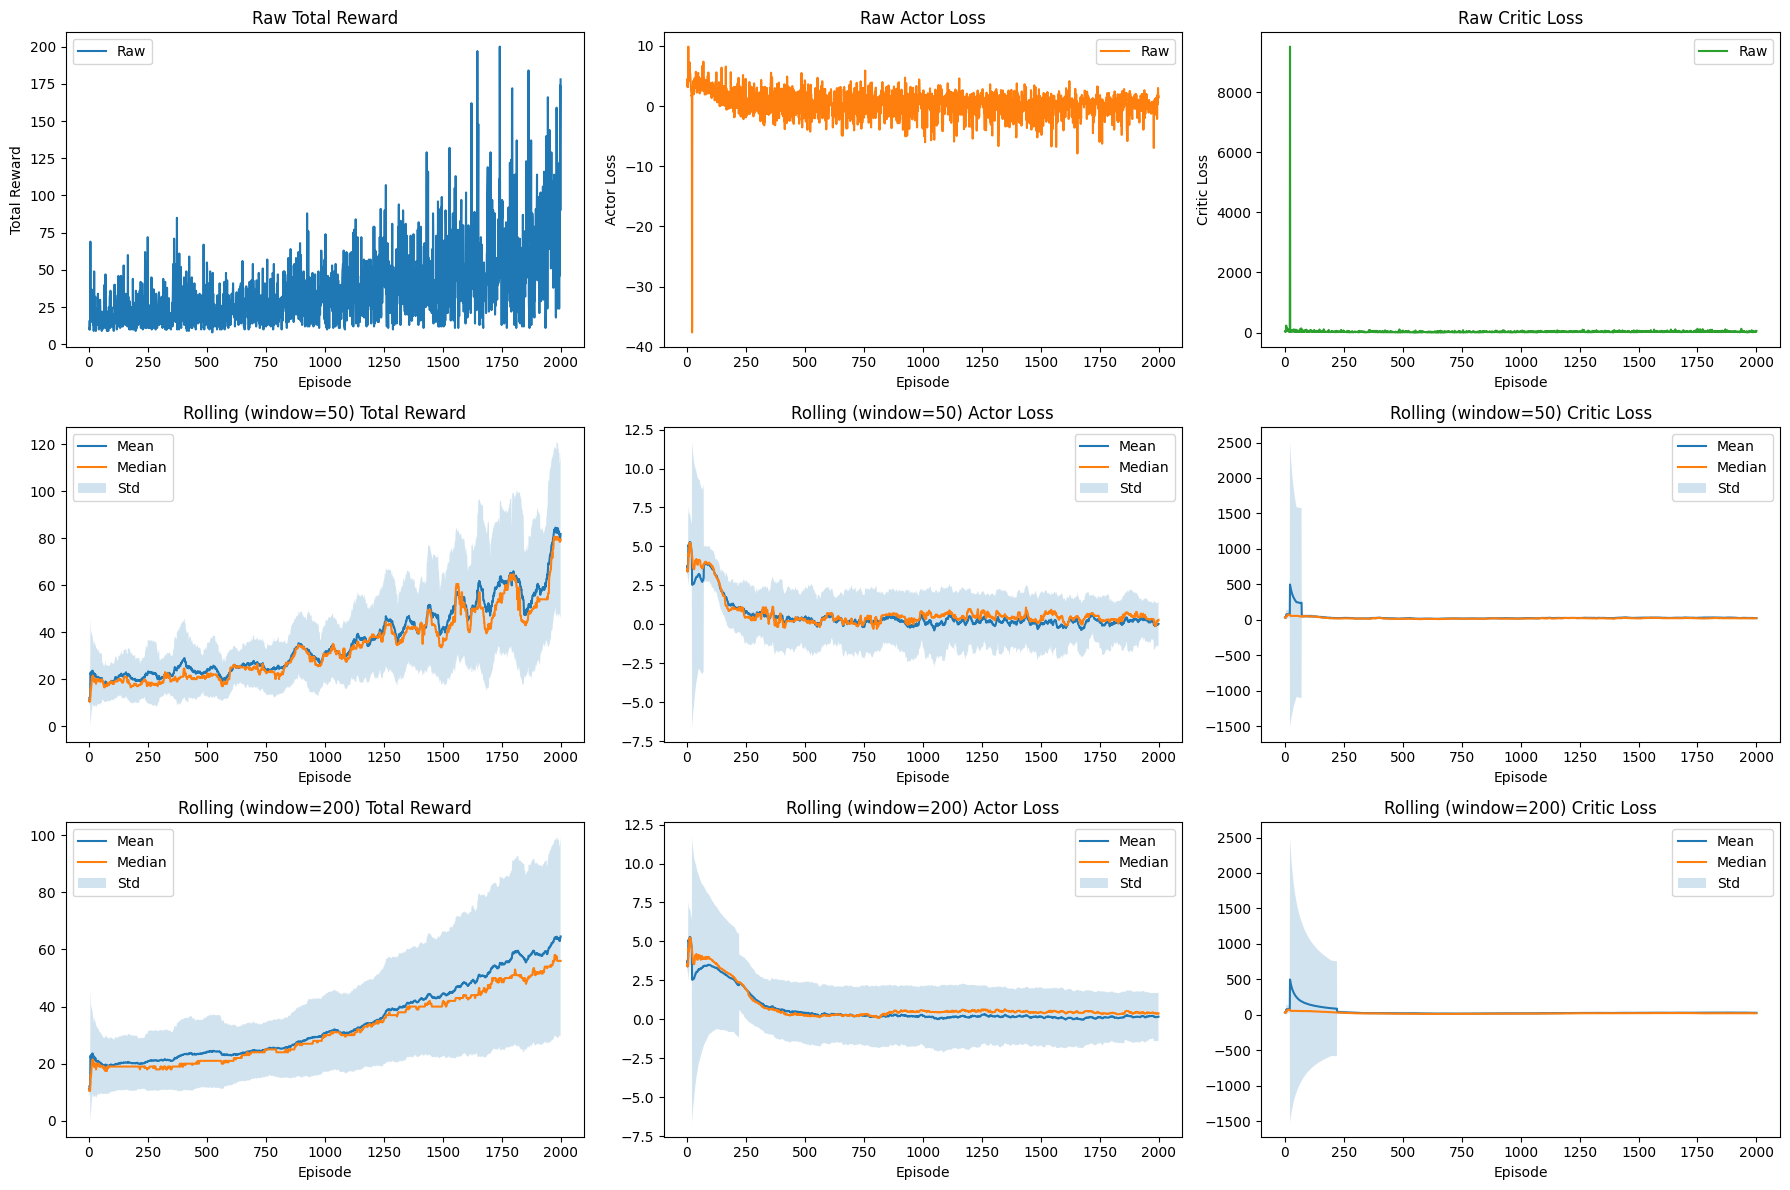

Metrics plot displayed.
Plotting neuron firing rates...


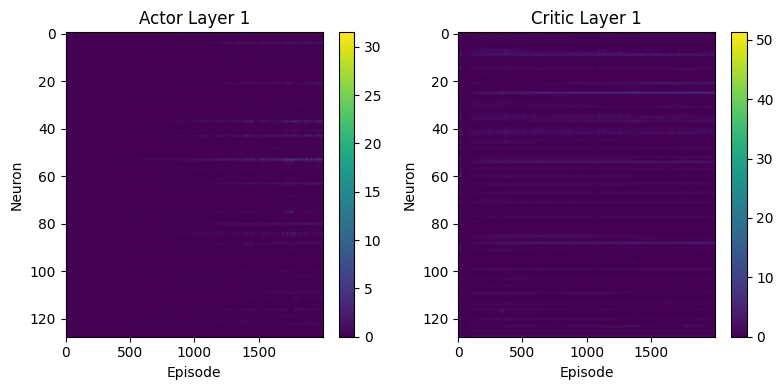

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [2]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from partial_cartpole import CartPolePartialObservation
from actor_critic import ActorCriticAgent
from reinforce import train_agent
from helper_functions import plot_metrics, plot_firing_rates

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Setup Complete.")

# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 2000,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-4,
    "l2_critic": 1e-4,
    "print_interval": 50,
    "record_history": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment to get partial observations
print("Wrapping base environment for partial observations (position, angle)")
env = CartPolePartialObservation(base_env)

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=50,
    window_2=200
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

'/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' already in sys.path
Setup Complete.
Configuration loaded:
  env_name: CartPole-v1
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 2000
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 50
  record_history: 20
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 2000 episodes...
Episode 50	Total Reward: 19.00	Actor Loss: 4.1398	Critic Loss: 57.1080
Episode 100	Total Reward: 16.00	Actor Loss: 3.3949	Critic Loss: 43.6664
Episode 150	Total Reward: 24.00	Actor Loss: 5.2351	Critic Loss: 70.2112
Episode 200	Total Reward: 19.00	Actor 

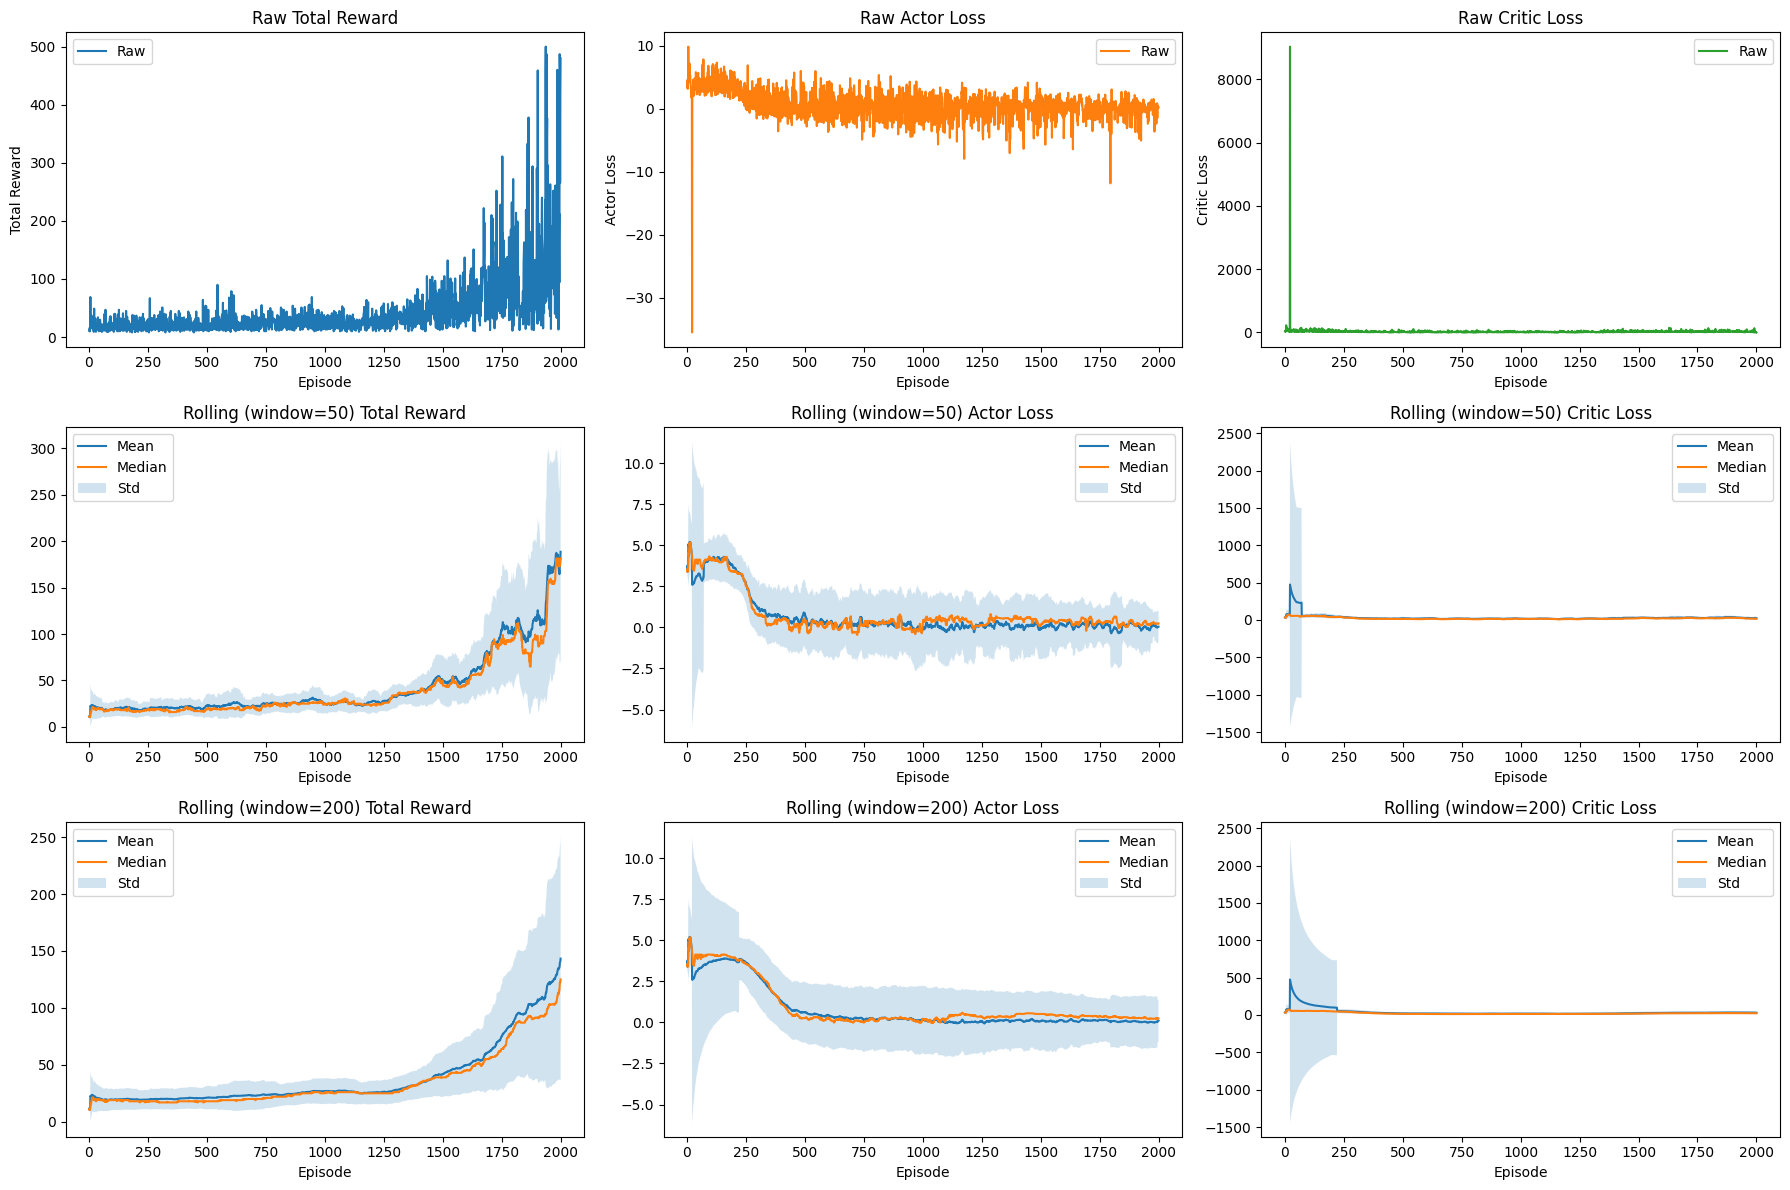

Metrics plot displayed.
Plotting neuron firing rates...


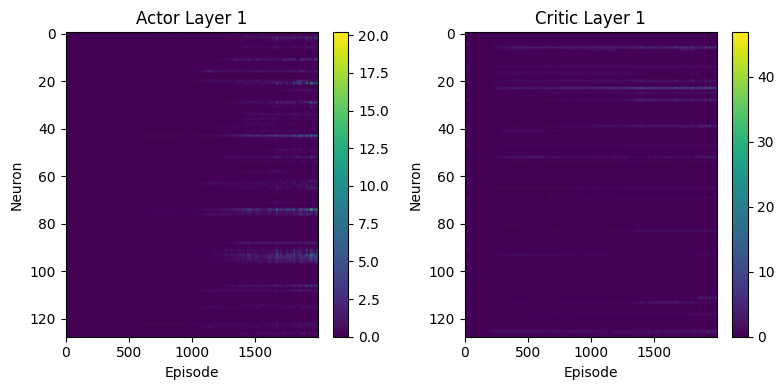

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [3]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from partial_cartpole import CartPolePartialObservation
from actor_critic import ActorCriticAgent
from reinforce import train_agent
from helper_functions import plot_metrics, plot_firing_rates

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Setup Complete.")

# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 2000,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-4,
    "l2_critic": 1e-4,
    "print_interval": 50,
    "record_history": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment to get partial observations
print("Wrapping base environment for partial observations (position, angle)")
env = CartPolePartialObservation(base_env)

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=50,
    window_2=200
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

#### RNN Full

'/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' already in sys.path
Setup Complete.
Configuration loaded:
  env_name: CartPole-v1
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 300
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 50
  record_history: 20
Creating base environment: CartPole-v1
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 300 episodes...
Episode 50	Total Reward: 36.00	Actor Loss: 3.3538	Critic Loss: 43.0538
Episode 100	Total Reward: 15.00	Actor Loss: -3.2085	Critic Loss: 38.1365
Episode 150	Total Reward: 99.00	Actor Loss: 2.7797	Critic Loss: 45.1054
Episode 200	Total Reward: 256.00	Actor Loss: 1.6840	Critic Loss: 27.0715
Episode 250	Total Reward: 137.00	Ac

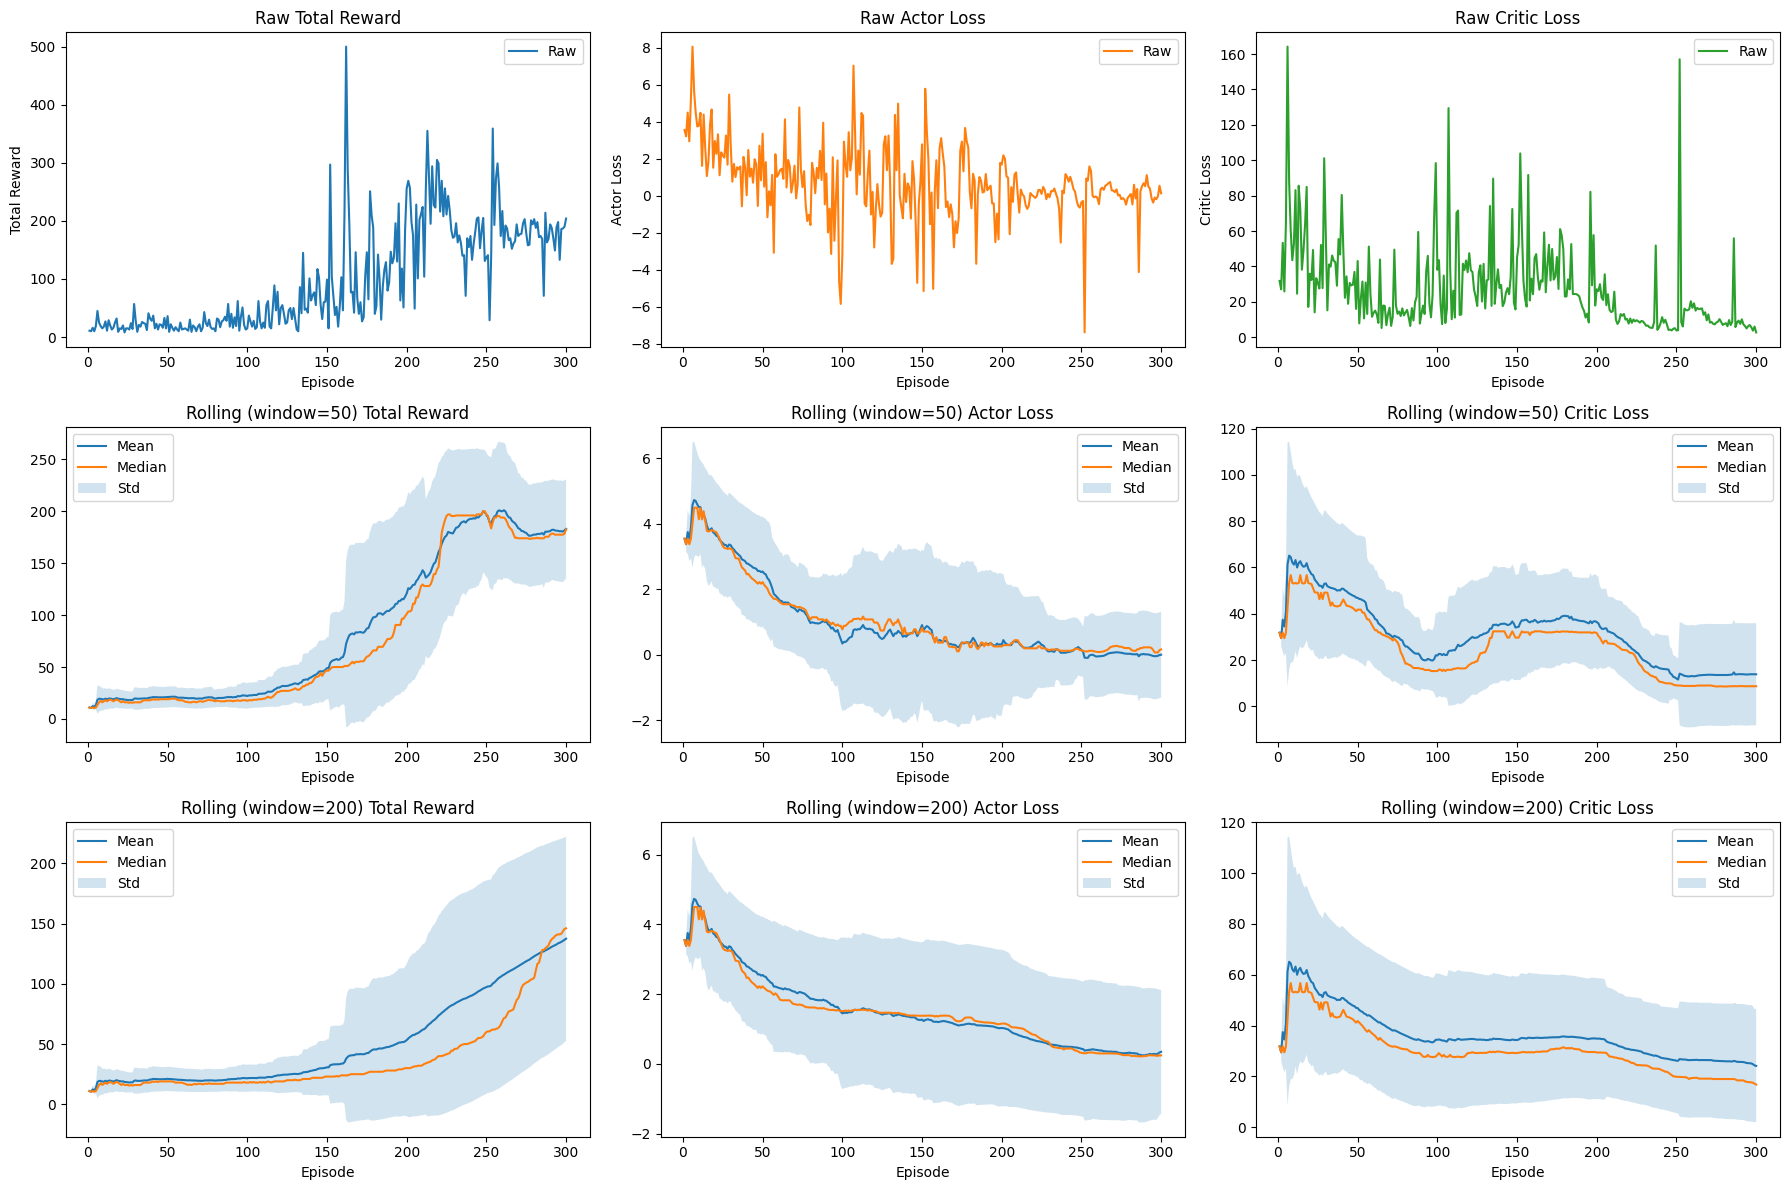

Metrics plot displayed.
Plotting neuron firing rates...


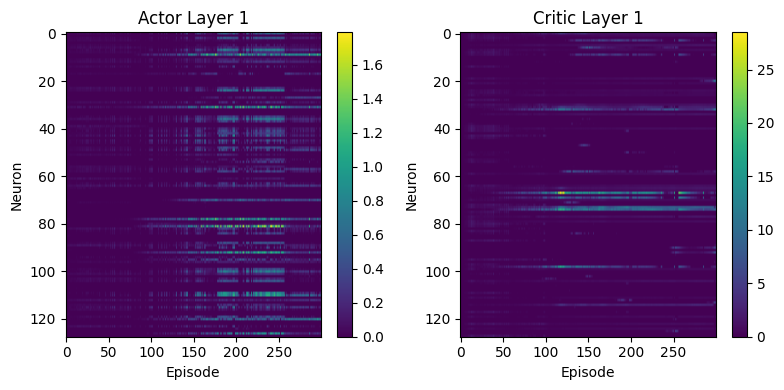

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [4]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from partial_cartpole import CartPolePartialObservation
from actor_critic import ActorCriticAgent
from reinforce import train_agent
from helper_functions import plot_metrics, plot_firing_rates

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Setup Complete.")

# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 300,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-4,
    "l2_critic": 1e-4,
    "print_interval": 50,
    "record_history": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
env = gym.make(config["env_name"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=50,
    window_2=200
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

#### FFNN 

'/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' already in sys.path
Setup Complete.
Configuration loaded:
  env_name: CartPole-v1
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 2000
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: Dense
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 50
  record_history: 20
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 2000 episodes...
Episode 50	Total Reward: 11.00	Actor Loss: -1.0457	Critic Loss: 7.0791
Episode 100	Total Reward: 18.00	Actor Loss: -0.2362	Critic Loss: 7.5859
Episode 150	Total Reward: 43.00	Actor Loss: 1.1095	Critic Loss: 28.1615
Episode 200	Total Reward: 44.00	Actor Loss: -

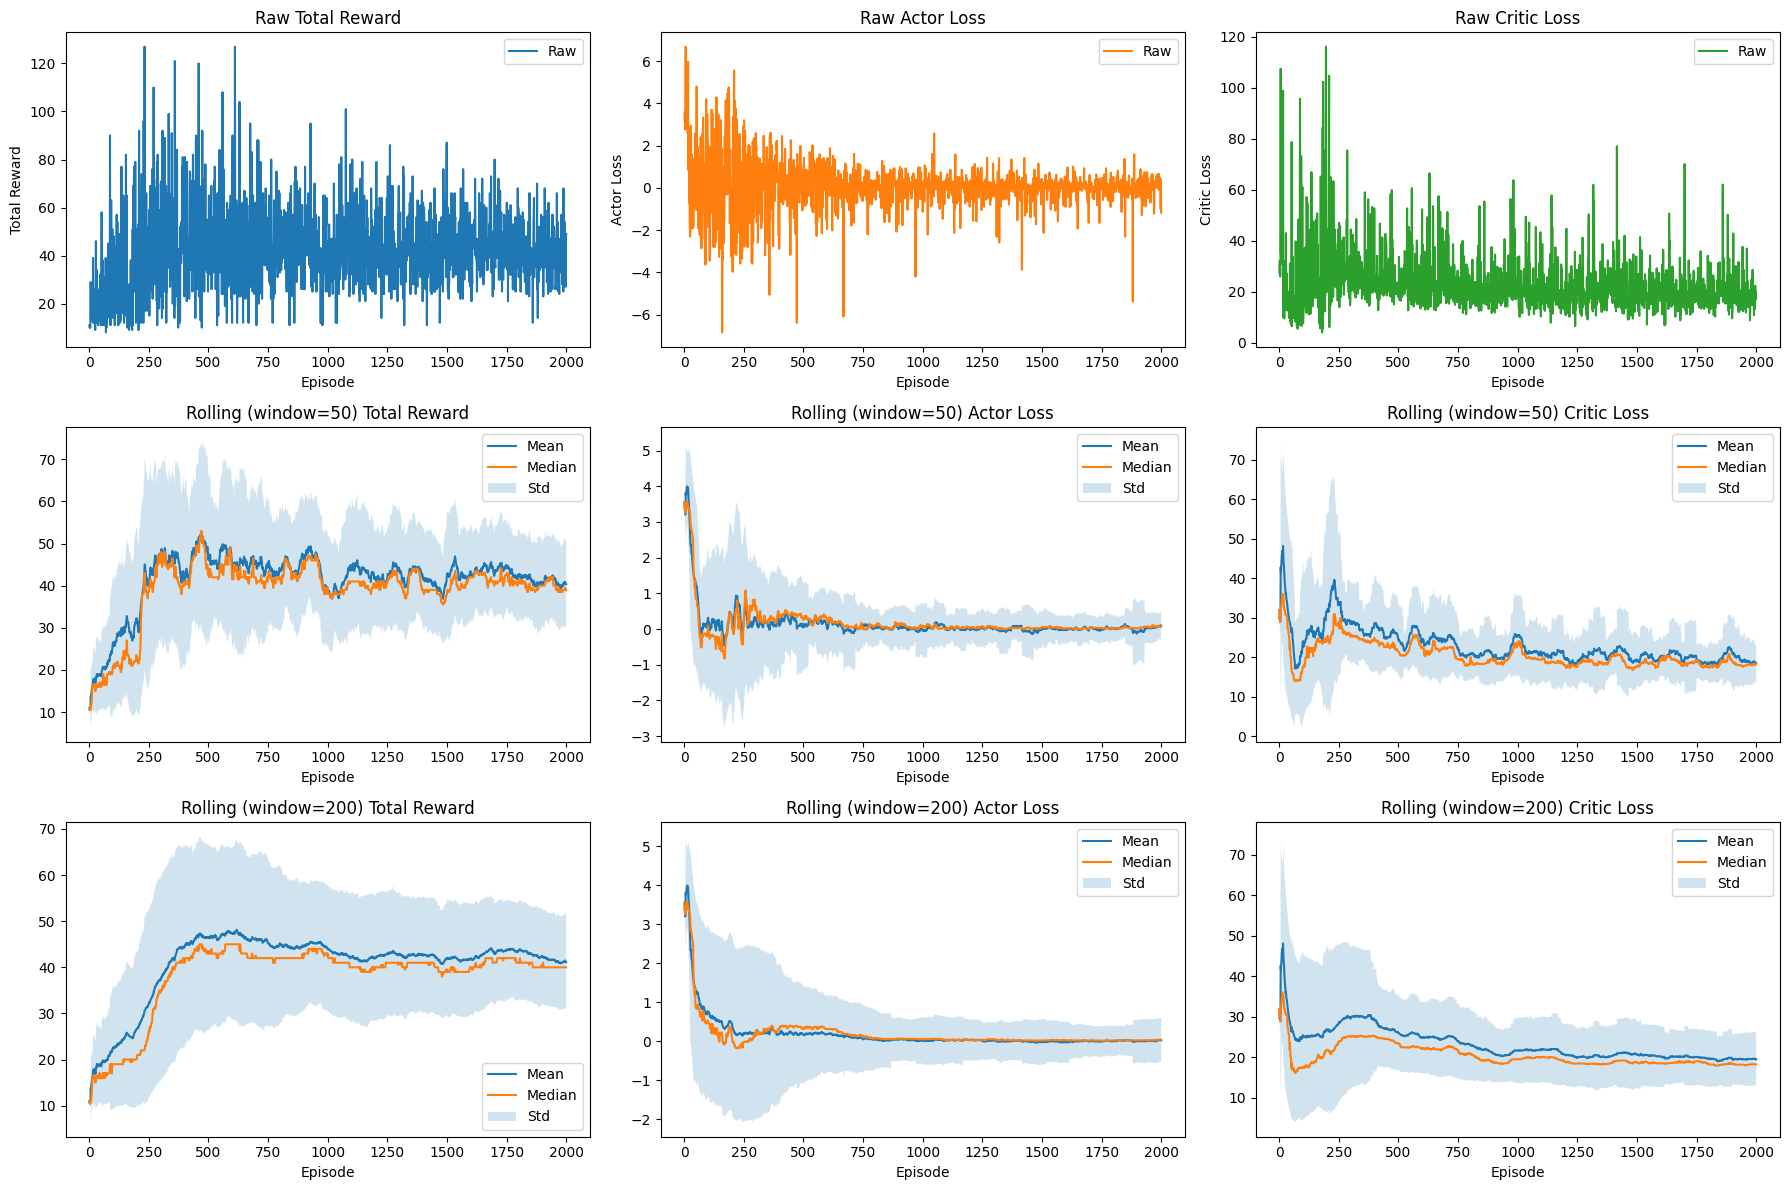

Metrics plot displayed.
Firing rate data not available (models might be Dense or logging was disabled/failed).
Closing the environment...
Environment closed.


In [5]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from partial_cartpole import CartPolePartialObservation
from actor_critic import ActorCriticAgent
from reinforce import train_agent
from helper_functions import plot_metrics, plot_firing_rates

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Setup Complete.")

# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 2000,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "Dense",
    "l2_actor": 1e-4,
    "l2_critic": 1e-4,
    "print_interval": 50,
    "record_history": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment to get partial observations
print("Wrapping base environment for partial observations (position, angle)")
env = CartPolePartialObservation(base_env)

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=50,
    window_2=200
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

'/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' already in sys.path
Setup Complete.
Configuration loaded:
  env_name: CartPole-v1
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 2000
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: Dense
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 50
  record_history: 20
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 2000 episodes...
Episode 50	Total Reward: 9.00	Actor Loss: -1.6164	Critic Loss: 10.4037
Episode 100	Total Reward: 11.00	Actor Loss: -3.5101	Critic Loss: 32.4697
Episode 150	Total Reward: 42.00	Actor Loss: 2.5224	Critic Loss: 34.5485
Episode 200	Total Reward: 35.00	Actor Loss: 

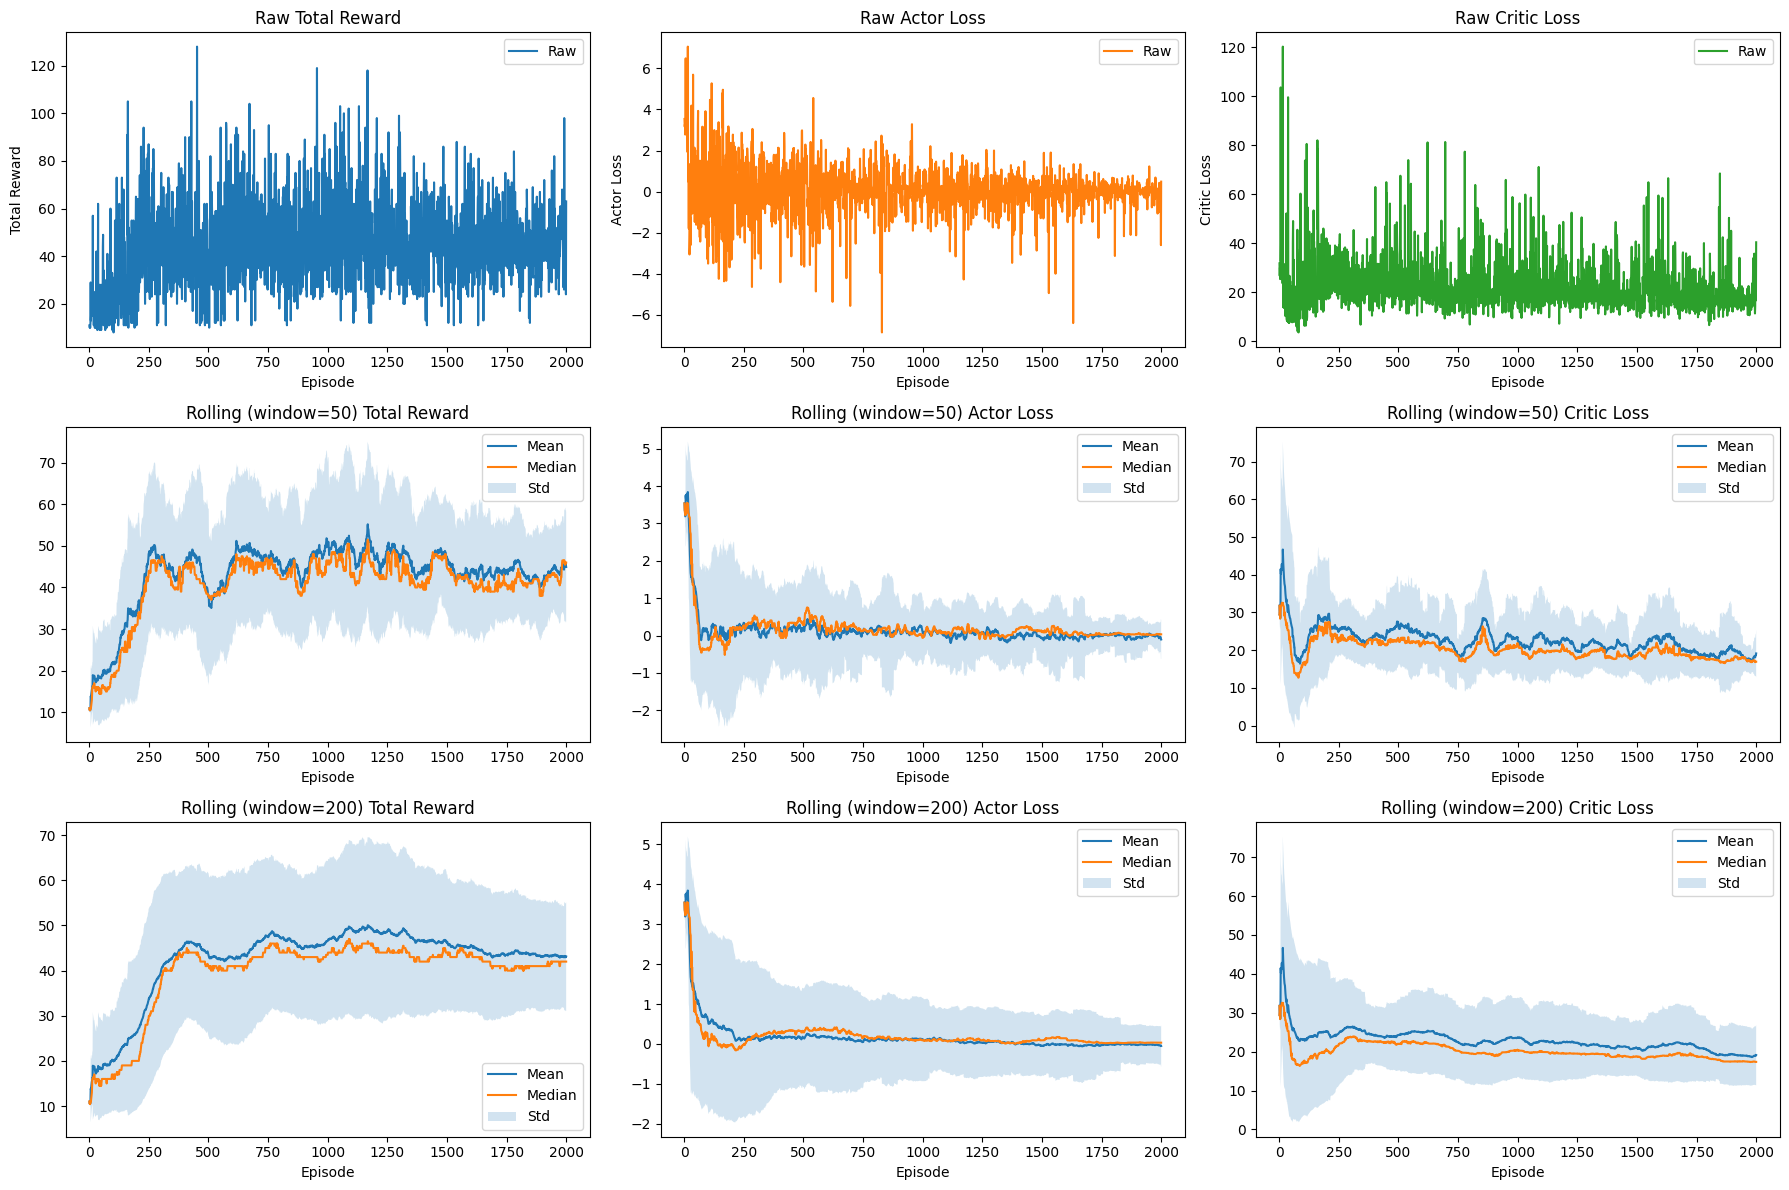

Metrics plot displayed.
Firing rate data not available (models might be Dense or logging was disabled/failed).
Closing the environment...
Environment closed.


In [6]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from partial_cartpole import CartPolePartialObservation
from actor_critic import ActorCriticAgent
from reinforce import train_agent
from helper_functions import plot_metrics, plot_firing_rates

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Setup Complete.")

# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 2000,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "Dense",
    "l2_actor": 1e-4,
    "l2_critic": 1e-4,
    "print_interval": 50,
    "record_history": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment to get partial observations
print("Wrapping base environment for partial observations (position, angle)")
env = CartPolePartialObservation(base_env)

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=50,
    window_2=200
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

'/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' already in sys.path
Setup Complete.
Configuration loaded:
  env_name: CartPole-v1
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 2000
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: Dense
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 50
  record_history: 20
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 2000 episodes...
Episode 50	Total Reward: 34.00	Actor Loss: 2.6263	Critic Loss: 40.2822
Episode 100	Total Reward: 36.00	Actor Loss: 2.1017	Critic Loss: 37.2766
Episode 150	Total Reward: 19.00	Actor Loss: 0.0198	Critic Loss: 9.0196
Episode 200	Total Reward: 51.00	Actor Loss: 1.

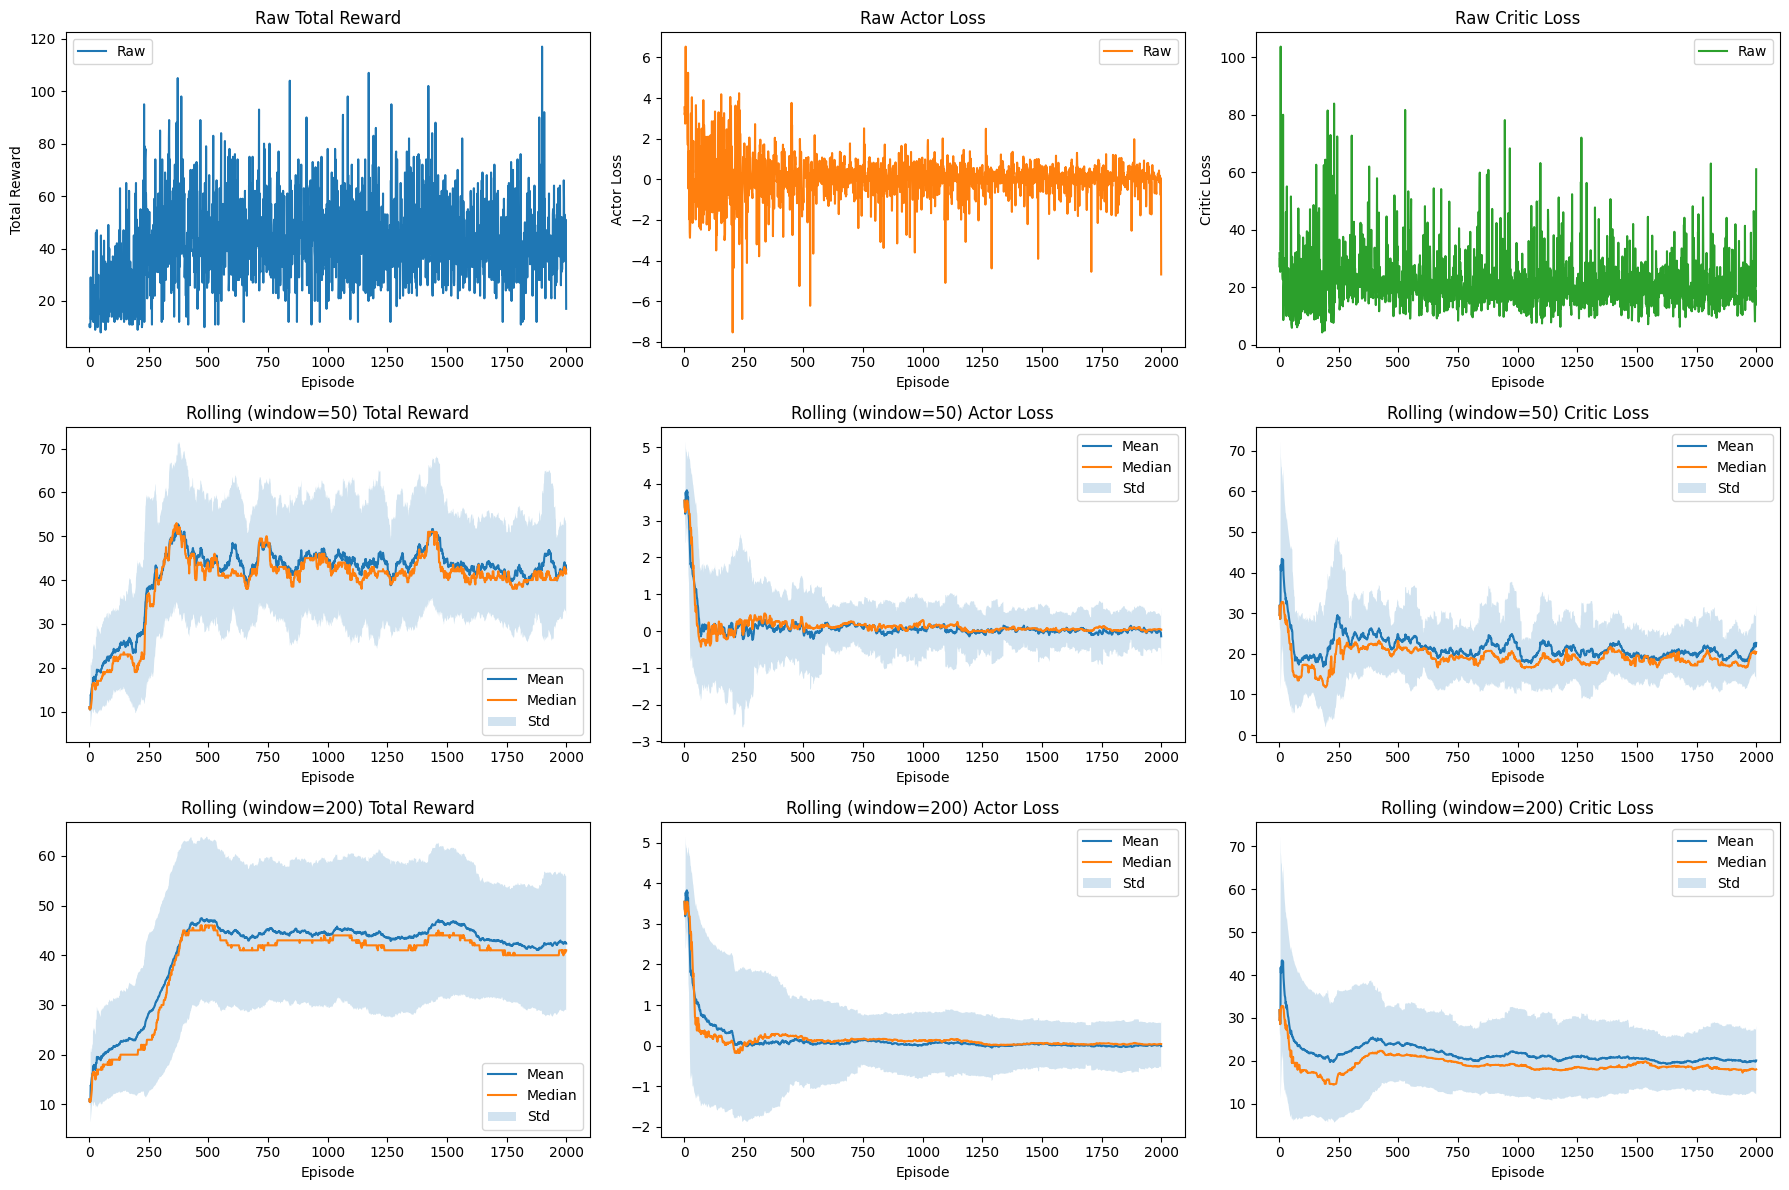

Metrics plot displayed.
Firing rate data not available (models might be Dense or logging was disabled/failed).
Closing the environment...
Environment closed.


In [7]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from partial_cartpole import CartPolePartialObservation
from actor_critic import ActorCriticAgent
from reinforce import train_agent
from helper_functions import plot_metrics, plot_firing_rates

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Setup Complete.")

# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 2000,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "Dense",
    "l2_actor": 1e-4,
    "l2_critic": 1e-4,
    "print_interval": 50,
    "record_history": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment to get partial observations
print("Wrapping base environment for partial observations (position, angle)")
env = CartPolePartialObservation(base_env)

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=50,
    window_2=200
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

#### FFNN full

'/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' already in sys.path
Setup Complete.
Configuration loaded:
  env_name: CartPole-v1
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 300
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 50
  record_history: 20
Creating base environment: CartPole-v1
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 300 episodes...
Episode 50	Total Reward: 37.00	Actor Loss: 3.7241	Critic Loss: 52.6646
Episode 100	Total Reward: 34.00	Actor Loss: 1.1934	Critic Loss: 26.2588
Episode 150	Total Reward: 14.00	Actor Loss: -2.3780	Critic Loss: 21.1454
Episode 200	Total Reward: 133.00	Actor Loss: 4.6364	Critic Loss: 100.4430
Episode 250	Total Reward: 148.00	A

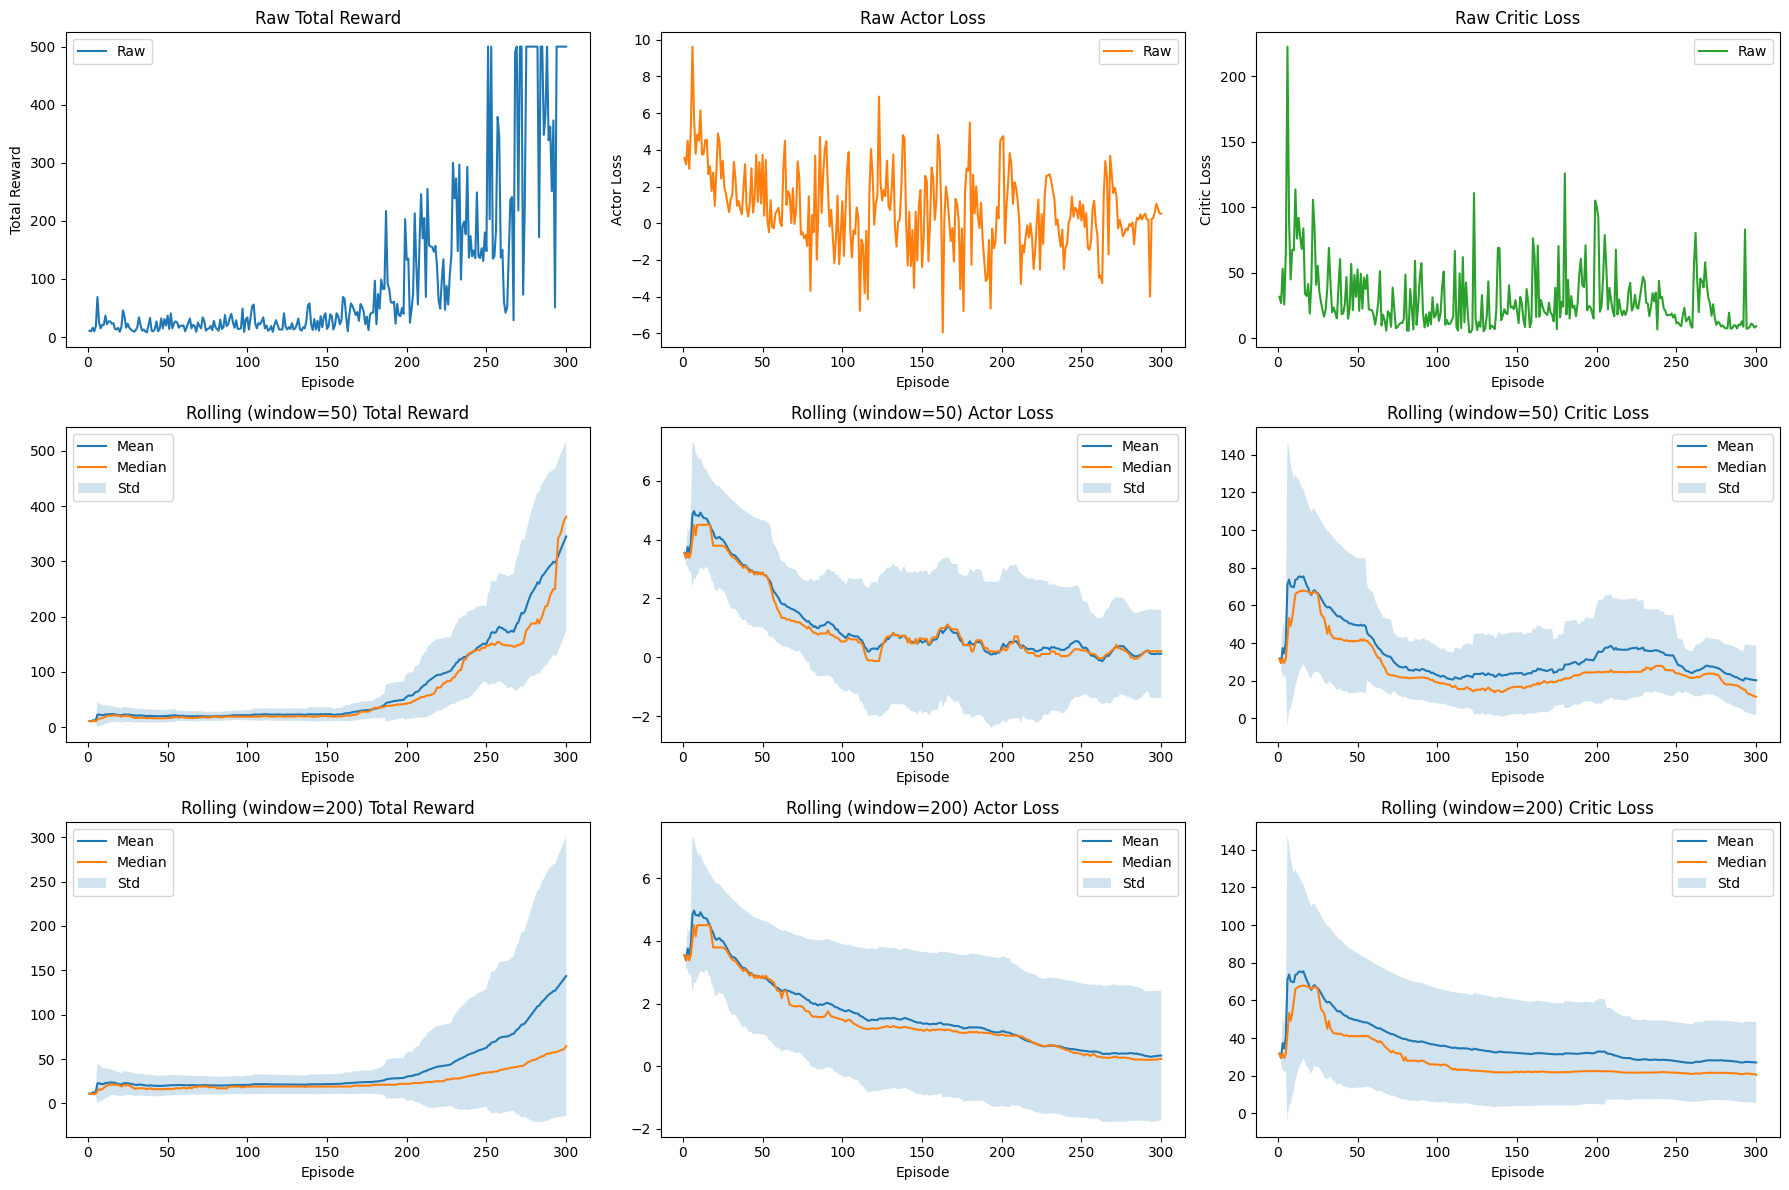

Metrics plot displayed.
Plotting neuron firing rates...


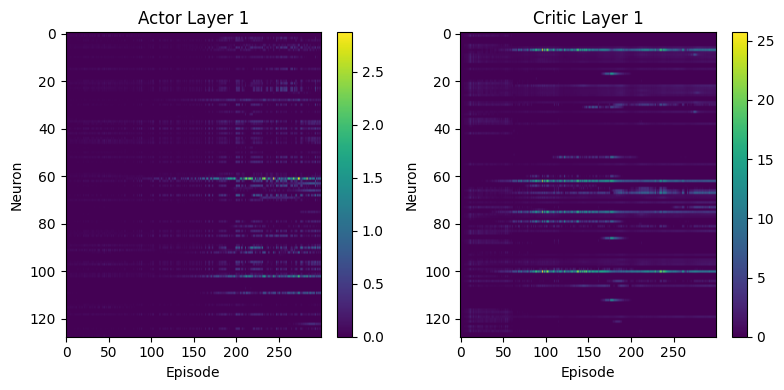

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [8]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from partial_cartpole import CartPolePartialObservation
from actor_critic import ActorCriticAgent
from reinforce import train_agent
from helper_functions import plot_metrics, plot_firing_rates

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Setup Complete.")

# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 300,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-4,
    "l2_critic": 1e-4,
    "print_interval": 50,
    "record_history": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
env = gym.make(config["env_name"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=50,
    window_2=200
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")